# Kaggle Competition: Cats and Dogs

Kaggle playground competition. 

The objective is to determine whether an image contains a picture of a cat or a dog.
Using image processing and neural networks (deep learning) we will train a model to 
discriminate cat and dog images.
In this first example we use Keras python package with a Theano backend to construct
a feed forward neural convolutional network.


# Table of Contents

### 1.[Import data](#Import_data)
### 2.[Split train and test data](#split_data)
### 3.[Model Architecture](#model_arch)
### 4.[Train and test model](#train_model)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

Using Theano backend.


<a id = "import_data"></a>
# Import Data

In [2]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.

TRAIN_DIR = 'C:'+os.sep+'Users'+os.sep+'IBM_ADMIN'+os.sep+'Desktop'+os.sep+'Perso'+os.sep+'Kaggle'+os.sep+'CatsDogs'+os.sep+'train'
TEST_DIR = 'C:'+os.sep+'Users'+os.sep+'IBM_ADMIN'+os.sep+'Desktop'+os.sep+'Perso'+os.sep+'Kaggle'+os.sep+'CatsDogs'+os.sep+'test'
IMG_SIZE = 50
LR = 1e-3

In [4]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]



In [5]:
def create_train_data():
    training_data = []
    for img in os.listdir(TRAIN_DIR):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [6]:
data=create_train_data()

In [7]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

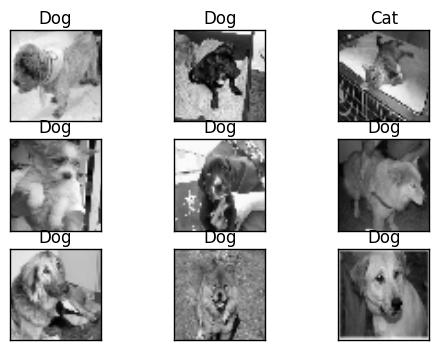

In [10]:
fig=plt.figure()
for i in xrange(9):
    y = fig.add_subplot(3,3,i+1)
    y.imshow(data[i][0], cmap = 'gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    if data[i][1][0]==1:
        plt.title('Cat')
    else:
        plt.title('Dog')

plt.show()

<a id = "split_data"></a>
# Split Train and Test Data

In [11]:
train_data=data[:20000]
test_data=data[20000:]

In [12]:
X_train=[]
Y_train=[]

for i in xrange(len(train_data)):
    X_train.append(train_data[i][0])
    Y_train.append(train_data[i][1][0])

X_test=[]
Y_test=[]

for i in xrange(len(test_data)):
    X_test.append(test_data[i][0])
    Y_test.append(test_data[i][1][0])

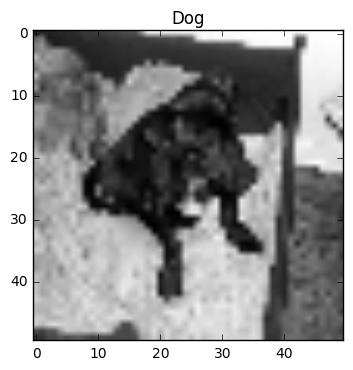

In [13]:
plt.imshow(X_train[1],cmap='gray')
if Y_train[1]==1:
    plt.title('Cat')
else:
    plt.title('Dog')
plt.show()

In [14]:
#Setup train and test sets as tensors for theano
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

<a id = "proc_data"></a>
# Preprocess Train and Test Data

In [15]:
#normalize data
X_train /= 255
X_test /= 255

In [16]:
X_train.shape

(20000L, 50L, 50L)

<a id = "model_arch"></a>
# Setup model architecture

In [17]:
from keras.utils import np_utils
print Y_train.shape, Y_test.shape
Y_train = np_utils.to_categorical(Y_train, 2)
Y_test = np_utils.to_categorical(Y_test, 2)
print Y_train.shape, Y_test.shape

(20000L,) (5000L,)
(20000L, 2L) (5000L, 2L)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [19]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 2, activation='relu', input_shape=(1,50,50), dim_ordering='th'))
model.add(MaxPooling2D(pool_size=(3,2)))

model.add(Convolution2D(64, 3, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 2), activation="relu", data_format="channels_first", input_shape=(1, 50, 50...)`
  app.launch_new_instance()
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 2), activation="relu")`


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 48, 49)        224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 24, 49)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 23, 64)         18880     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 11, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 11, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               180352    
__________

<a id = "train_model"></a>
# Train and test model

In [21]:
X_train = X_train.reshape(X_train.shape[0], 1, 50, 50)
X_test = X_test.reshape(X_test.shape[0], 1, 50, 50)

In [ ]:
model_fit=model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=15, verbose=1)

Epoch 1/15
 8576/20000 [===========>..................] - ETA: 94s - loss: 0.4159 - acc: 0.8045

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)
print score

[0.51185515489578248, 0.74299999999999999]


In [24]:
# list all data in history
print(model_fit.history.keys())

['acc', 'loss']


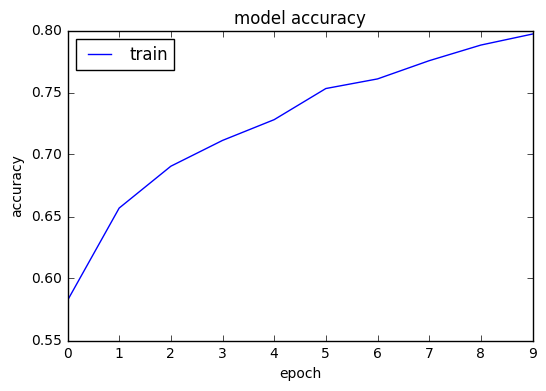

In [25]:
# summarize history for accuracy
plt.plot(model_fit.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

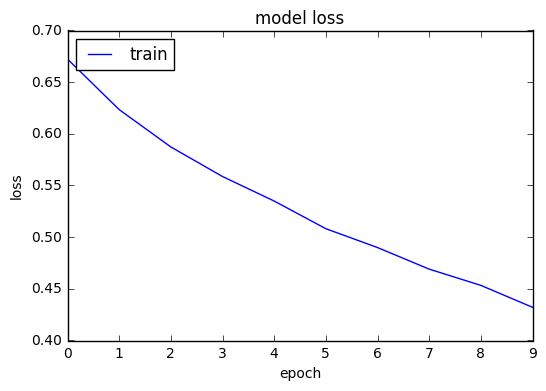

In [26]:
# summarize history for loss
plt.plot(model_fit.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()